In [1]:
## Factor Analysis --> Unsupervised Learning (similar to PCA) -- Visualization not possible due to large dimensionality
## Kaiser-Meyer-Olkin KMO Criterion --> Eigenvalues > 1  . Scree plot (or find "elbow")
## most common rotation is varimax

In [21]:
# https://www.geeksforgeeks.org/data-visualization-using-plotnine-and-ggplot2-in-python/
!pip install plotnine

  Obtaining dependency information for plotnine from https://files.pythonhosted.org/packages/f7/1c/d0cc3272f7550253b46f6f1e86f02c046aa4c5841646c0435c32a93dd177/plotnine-0.13.4-py3-none-any.whl.metadata
  Obtaining dependency information for pandas<3.0.0,>=2.1.0 from https://files.pythonhosted.org/packages/ab/63/966db1321a0ad55df1d1fe51505d2cdae191b84c907974873817b0a6e849/pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for mizani~=0.11.0 from https://files.pythonhosted.org/packages/2a/eb/777d71d00d0a67659234b50505842cfc44fb304e01d3acf80501b6b2ab63/mizani-0.11.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.3 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 13.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/127.3 kB ? eta -:--:--
  

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [13]:
from sklearn.decomposition import FactorAnalysis
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
from plotnine import ggplot, aes, geom_point

In [4]:
iris = load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
X.shape

(150, 4)

In [7]:
fa = FactorAnalysis(n_components=2)

In [8]:
fa.fit(X)

FactorAnalysis(n_components=2)

In [9]:
fa.noise_variance_

array([0.01609026, 0.09807659, 0.00405033, 0.04071555])

In [12]:
##Modeling

steps = [
    ('scaler', StandardScaler()),
    ('fa', FactorAnalysis(n_components=2)),
]

In [14]:
pipeline = Pipeline(steps)

In [15]:
factors = pipeline.fit_transform(X)

In [16]:
factors.shape

(150, 2)

In [17]:
mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
y_strings = [mapping[i] for i in y]
y_strings

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [18]:
# %%
df = pd.DataFrame(factors, columns=['factor1', 'factor2'])
df['species'] = y_strings
df

,factor1,factor2,species
0,-1.328255,-0.559732,setosa
1,-1.337759,-0.000107,setosa
2,-1.402517,0.307654,setosa
3,-1.300187,0.719597,setosa
4,-1.333781,-0.363828,setosa
...,...,...,...
145,0.843635,-0.540930,virginica
146,0.707527,0.247837,virginica
147,0.826590,-0.133065,virginica
148,0.923642,0.630654,virginica


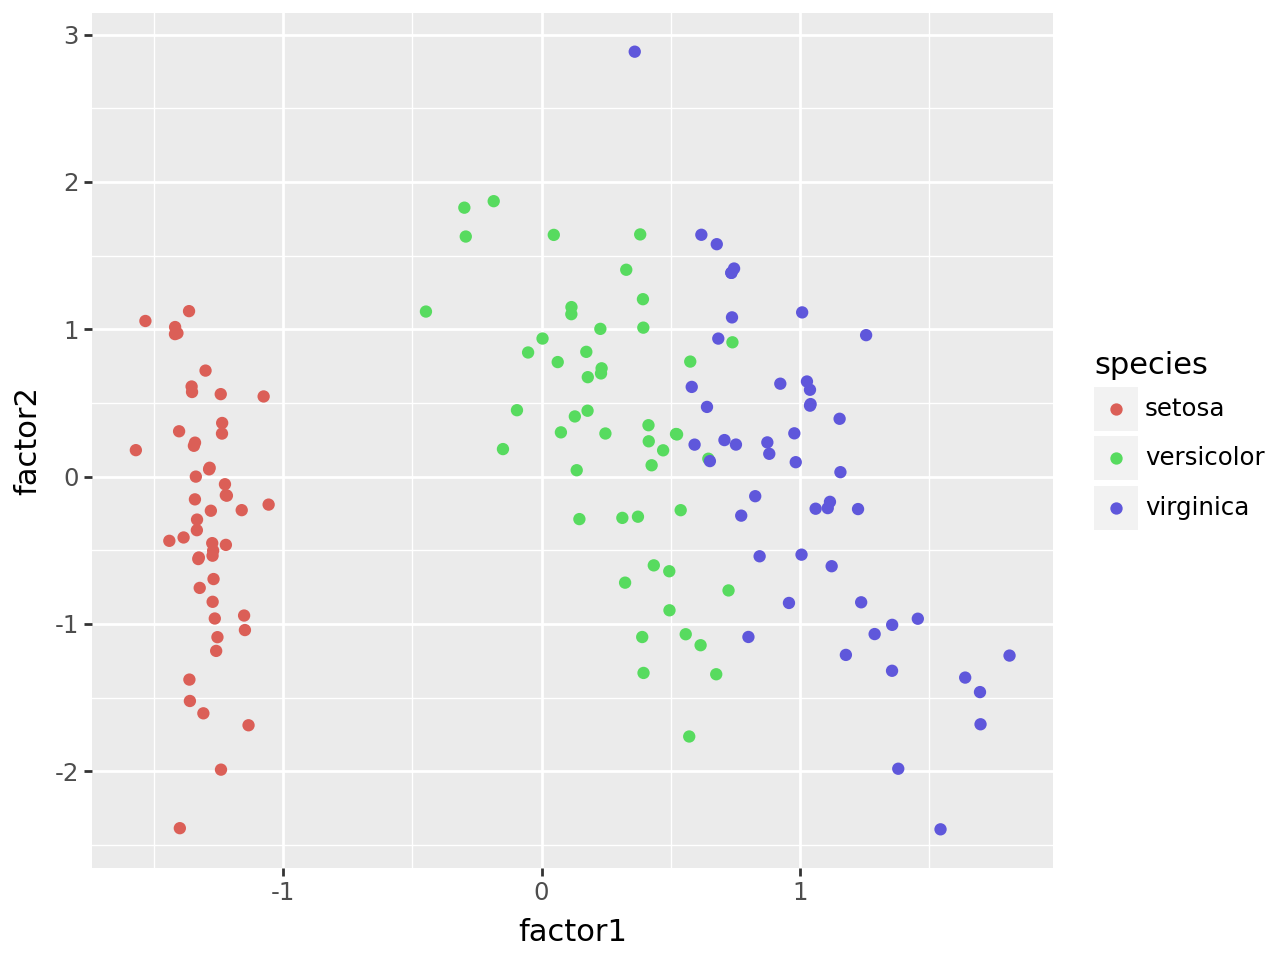

In [23]:
(ggplot(df) + aes(x='factor1', y='factor2', color='species') + geom_point())
# %%